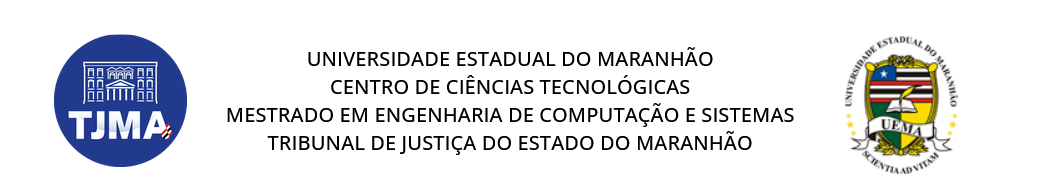

# **Analise da Base de Temas Repetitivos do Supremo Trubunal de Justiça**

# **Importações e Instalações Necessarias**

In [ ]:
pip install textlytics

In [ ]:
!python -m pip uninstall pandas-profiling -y
!pip install pandas-profiling[notebook,html]

In [ ]:
pip install Unidecode

In [2]:
# Importando as bibliotecas
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from tqdm import tqdm
import multiprocessing
import os
import time
import re

# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

# use sklearn to import a dataset
from sklearn.datasets import load_wine

import textlytics
textlytics.config.setLanguage('english')
textlytics.config.setIncidence(1)
#textlytics.config.setPosPtDir('/content/nlpnet')

from collections import Counter
import pathlib
from nltk.corpus import stopwords
from unidecode import unidecode
from pandas_profiling import ProfileReport
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
from nltk.probability import FreqDist
nltk.download('punkt');
nltk.download('stopwords')
from yellowbrick.text import FreqDistVisualizer
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('seaborn')
%matplotlib inline

[nltk_data] Downloading package punkt to /home/matheus-
[nltk_data]     uema/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/matheus-uema/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/matheus-
[nltk_data]     uema/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/matheus-
[nltk_data]     uema/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# **ANÁLISE DOS DADOS (AED)**

In [5]:
train = pd.read_csv("train_small.csv")
valid = pd.read_csv("validation_small.csv")
test = pd.read_csv("test_small.csv")

In [6]:
train_docs = train.loc[train["pages"] == 1]["document_type"].value_counts()
valid_docs = valid.loc[valid["pages"] == 1]["document_type"].value_counts()
test_docs = test.loc[test["pages"] == 1]["document_type"].value_counts()
train_docs, valid_docs, test_docs

(outros                              38585
 peticao_do_RE                         453
 sentenca                              420
 acordao_de_2_instancia                301
 agravo_em_recurso_extraordinario      270
 despacho_de_admissibilidade           265
 Name: document_type, dtype: int64,
 outros                              25898
 peticao_do_RE                         326
 sentenca                              284
 agravo_em_recurso_extraordinario      237
 acordao_de_2_instancia                201
 despacho_de_admissibilidade           147
 Name: document_type, dtype: int64,
 outros                              25744
 peticao_do_RE                         312
 sentenca                              265
 agravo_em_recurso_extraordinario      213
 acordao_de_2_instancia                199
 despacho_de_admissibilidade           147
 Name: document_type, dtype: int64)

# **ANÁLISE DOS DADOS (AED)**


***
#### **Leitura dos Dados**

In [67]:
dataset = pd.read_csv('train_small.csv')

***
#### **Leitura da Base**

In [74]:
dataset.head()

,themes,process_id,file_name,document_type,pages,body
0,[232],AI_856934,AI_856934_1926210_1060_17072013.pdf,outros,1,tribunal justiça estado bahia poder judiciário...
1,[232],AI_856934,AI_856934_1926211_34_17072013.pdf,outros,1,excelentíssimo senhor doutor juiz direito juiz...
2,[232],AI_856934,AI_856934_1926211_34_17072013.pdf,outros,2,razões recurso inominado recorrente atlantico ...
3,[232],AI_856934,AI_856934_1926211_34_17072013.pdf,outros,3,empresa recorrente tornou credora dos débitos ...
4,[232],AI_856934,AI_856934_1926211_34_17072013.pdf,outros,4,entretanto verdade parte apelante tornou titul...


***
#### **Quantidade de Observações**

In [7]:
dataset.shape

(149217, 6)

***
#### **Quantidade de Atributos**

In [8]:
dataset.columns

Index(['themes', 'process_id', 'file_name', 'document_type', 'pages', 'body'], dtype='object')

***
#### **Informações da Base**

In [9]:
dataset.info(verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149217 entries, 0 to 149216
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   themes         149217 non-null  object
 1   process_id     149217 non-null  object
 2   file_name      149217 non-null  object
 3   document_type  149217 non-null  object
 4   pages          149217 non-null  int64 
 5   body           149217 non-null  object
dtypes: int64(1), object(5)
memory usage: 244.1 MB


***
#### **Estatistica descritiva**

In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
pages,149217.0,13.163232,29.74654,1.0,1.0,4.0,11.0,317.0


***
#### **Verificação de Valores Nulos**

In [11]:
total=dataset.isnull().sum().sort_values(ascending=False)
porcentagem=round(total/dataset.shape[0]*100,5)
data = pd.concat([total,porcentagem],axis=1,keys=['Total','Porcentagem'])
data

,Total,Porcentagem
body,0,0.0
pages,0,0.0
document_type,0,0.0
file_name,0,0.0
process_id,0,0.0
themes,0,0.0


***
#### **Analise Usando Pandas Profile**

In [ ]:
profile = ProfileReport(dataset, title = "Estrutura", explorative=True) 
profile 

Output hidden; open in https://colab.research.google.com to view.

***
#### **Distribuição da variável Tema**

In [12]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle

tqdm.pandas()

In [13]:
themes = {"5", "6", "26", "33", "139", "163", "232", "313", "339", "350", "406", "409", "555", "589",
         "597", "634", "660", "695", "729", "766", "773", "793", "800", "810", "852", "895", "951", "975"}

In [72]:
def replace_others(sentence):
    sentence = sentence.strip("[]")
    numbers = sentence.split(",")
    new_numbers = list({x.strip(" ") if x.strip(" ") in themes else "0" for x in numbers})
    return ",".join(new_numbers)

def rename_others(df, theme_col="themes"):
    df[theme_col] = df[theme_col].progress_apply(replace_others)
    return df

def disentangle_themes(df, lst_col="themes"):
    x = df.assign(**{lst_col:df[lst_col].str.split(",")})
    
    return pd.DataFrame({
            col:np.repeat(x[col].values, x[lst_col].str.len())
            for col in x.columns.difference([lst_col])
        }).assign(**{lst_col:np.concatenate(x[lst_col].values)})[x.columns.tolist()]

def strip_trash(df, column="body"):
    df[column] = df[column].str.strip('{}"')
    return df

In [ ]:
dataset.themes = rename_others(dataset.themes)
dataset.themes = disentangle_themes(dataset.themes)
dataset.body = strip_trash(dataset.body)

100%|██████████| 149217/149217 [00:01<00:00, 112183.06it/s]


In [16]:
counter = Counter(dataset.themes) 
print(counter) 

Counter({'0': 38574, '409': 13293, '729': 13087, '163': 12504, '597': 8490, '339': 8440, '139': 8315, '852': 8218, '589': 7905, '660': 7853, '406': 7754, '695': 7677, '634': 7526, '555': 7243, '773': 6567, '26': 5662, '313': 5086, '810': 4844, '350': 3935, '895': 3599, '766': 3530, '975': 3413, '6': 3091, '793': 2935, '800': 2381, '232': 2115, '33': 1012, '5': 608, '951': 585})


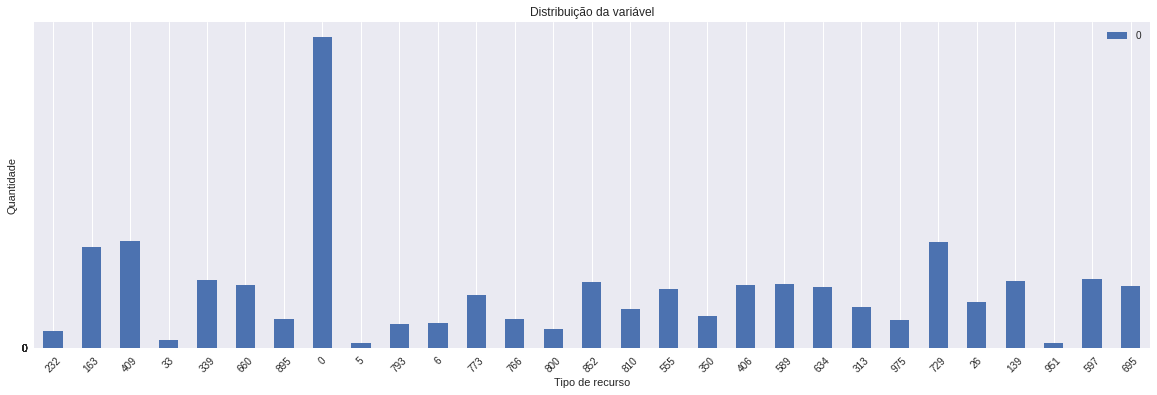

In [17]:
pd.DataFrame.from_dict(counter, orient='index').plot(kind='bar',figsize=(20,6), rot=45)
plt.xlabel('Tipo de recurso')
plt.ylabel('Quantidade')
plt.title('Distribuição da variável')
plt.yticks(ticks=np.linspace(0,counter[0], 10))
plt.show()

***
#### **Relação dos temas com o tipo do documneto**

In [18]:
#contagem de multiplas colunas e sua relação - Geral
geral = dataset.groupby(['themes', 'document_type']).size()
geral_novo = geral.reset_index(name='valores')
geral_novo 

,themes,document_type,valores
0,0,acordao_de_2_instancia,54
1,0,agravo_em_recurso_extraordinario,639
2,0,despacho_de_admissibilidade,25
3,0,outros,35427
4,0,peticao_do_RE,1976
...,...,...,...
139,895,peticao_do_RE,65
140,895,sentenca,7
141,951,outros,585
142,975,outros,3402


***
#### **Palavras mais frequentes na Base**

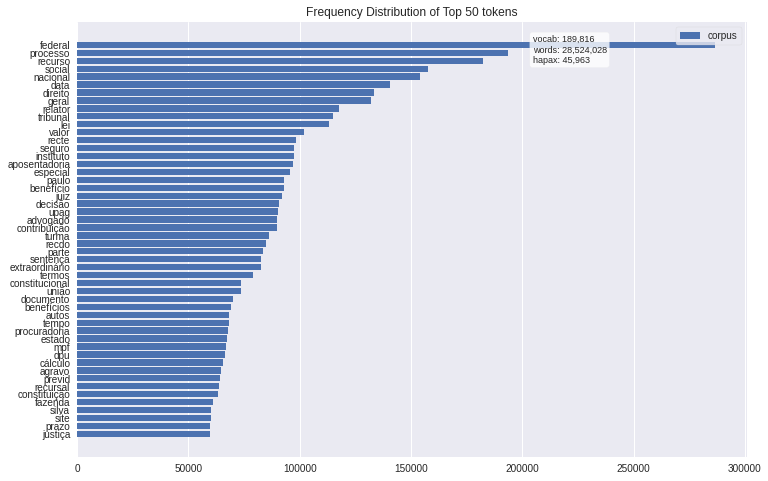

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [22]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(dataset['body'])
features   = vectorizer.get_feature_names()
plt.figure(figsize=(12,8))
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
for label in visualizer.ax.texts:
    label.set_size(20)
visualizer.poof()

***
#### **Quantidade de palavras Ementa**

In [23]:
words =[]
inicio = time.process_time()
for _, pet in enumerate(dataset.body):
  words.append(textlytics.wordCounter(pet))
fim = time.process_time() - inicio
print("Tempo de processamento (segundos): ", fim)
print('Total: ', sum(words))
print('Média: ', sum(words) / dataset.shape[0])

Tempo de processamento (segundos):  49.900541019
Total:  28949982
Média:  140.36899370642254


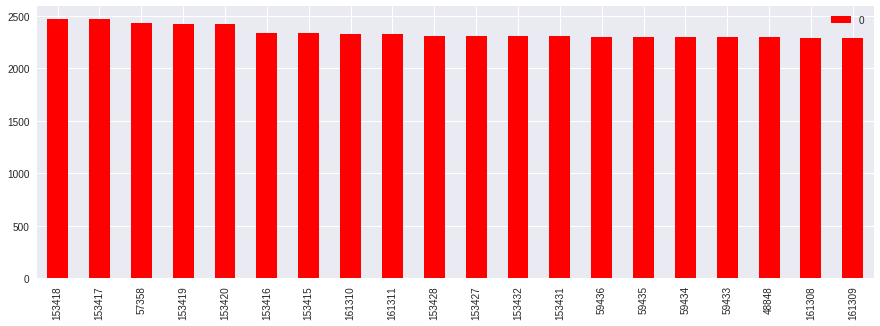

In [24]:
data = pd.DataFrame(words).sort_values(by=[0], ascending=False)
data[:20].plot(kind='bar', color='red', figsize=(15,5))
plt.show()

***
#### **Quantidade de palavras unicas Ementa**

In [25]:
words_uniques =[]
inicio = time.process_time()
for _, pet in enumerate(dataset.body):
  words_uniques.append(textlytics.uniqueWordsCounter(pet))
fim = time.process_time() - inicio
print("Tempo de processamento (segundos): ", fim)
print('Total: ', sum(words_uniques))
print('Média: ', sum(words_uniques) / dataset.shape[0])

Tempo de processamento (segundos):  45.90433321300003
Total:  20421033
Média:  99.01490966922353


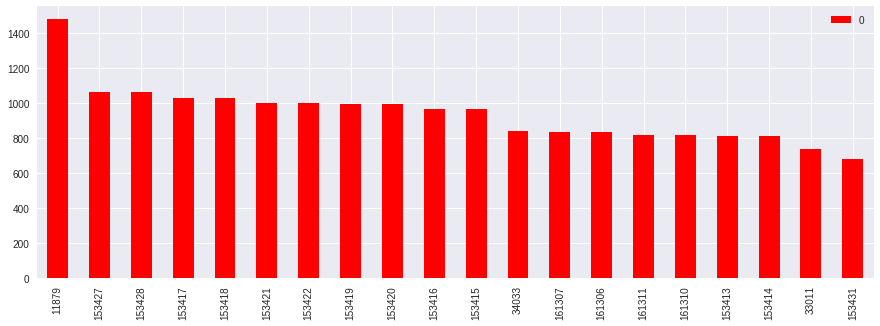

In [26]:
data = pd.DataFrame(words_uniques).sort_values(by=[0], ascending=False)
data[:20].plot(kind='bar', color='red', figsize=(15,5))
plt.show()

***
#### **Quantidade de palavras Raras Ementa**

In [27]:
rare_words =[]
inicio = time.process_time()
for _, pet in enumerate(dataset.body):
  if pet is not np.nan:
    rare_words.append(textlytics.rareWordsRatio(pet))
print("Tempo de processamento (segundos): ", fim)
print('Total: ', sum(rare_words))
print('Média: ', sum(rare_words) / dataset.shape[0])

Tempo de processamento (segundos):  45.90433321300003
Total:  130635.08454154825
Média:  0.6334067965862833


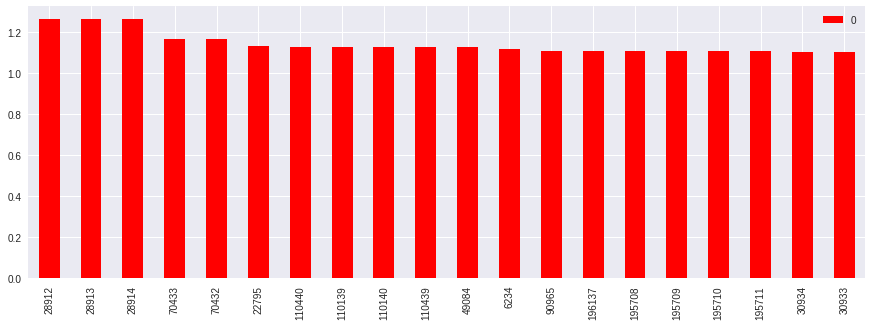

In [28]:
data = pd.DataFrame(rare_words).sort_values(by=[0], ascending=False)
data[:20].plot(kind='bar', color='red', figsize=(15,5))
plt.show()

***
#### **Quantidades de Tokens Geral**

In [20]:
# Limpeza de StopWords
def rm_stopwords_nltk(text,palavras = nltk.corpus.stopwords.words('portuguese')):
    new_stopwords = ['a','o', 'abaixo','se','10','de','acaso','nº','art','acerca', 'acima', 'acola', 'ademais', 'adentro', 'adiante', 'afinal', 'afora', 'agora', 'agorinha', 'ai', 'ainda', 'alem', 'algo', 'alguem', 'algum', 'alguma', 'algumas', 'alguns', 'ali', 'alias', 'amiude', 'ante', 'antes', 'ao', 'aonde', 'aos', 'apenas', 'apesar', 'apos', 'apud', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'as', 'assim', 'ate', 'atras', 'atraves', 'basicamente', 'bastante', 'bastantes', 'bem', 'bom', 'ca', 'cada', 'cade', 'caso', 'certa', 'certamente', 'certas', 'certeiramente', 'certo', 'certos', 'chez', 'com', 'comigo', 'como', 'comumente', 'conforme', 'confronte', 'conosco', 'conquanto', 'consequentemente', 'consigo', 'consoante', 'contanto', 'contigo', 'contra', 'contudo', 'convosco', 'cuja', 'cujas', 'cujo', 'cujos', 'da', 'dai', 'dali', 'dantes', 'daquela', 'daquelas', 'daquele', 'daqueles', 'daqui', 'daquilo', 'das', 'de', 'debaixo', 'defronte', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentre', 'dentro', 'depois', 'desde', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'detras', 'diante', 'disso', 'disto', 'diversos', 'do', 'donde', 'doravante', 'dos', 'dum', 'duma', 'dumas', 'duns', 'durante', 'e', 'eis', 'elas', 'ele', 'em', 'embaixo', 'embora', 'enend', 'enquanto', 'entanto', 'entao', 'entre', 'entretanto', 'exceto', 'essa', 'essas', 'esse', 'esta', 'estas', 'este', 'estes', 'eu', 'exatamente', 'frequentemente', 'fora', 'graCas', 'hoje', 'ibidem', 'idem', 'in', 'inclusive', 'inda', 'inicialmente', 'isso', 'visto', 'ja', 'jamais', 'la', 'largamente', 'lha', 'lhas', 'lhe', 'lhos', 'logo', 'mais', 'malgrado', 'mas', 'me', 'mediante', 'melhor', 'menos', 'meramente', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus', 'mim', 'minha', 'minhas', 'mui', 'muita', 'muitas', 'muitissimo', 'muito', 'muitos', 'mutuamente', 'na', 'nada', 'nadinha', 'nalgum', 'nalguma', 'nalgumas', 'nalguns', 'naquela', 'naquelas', 'naquele', 'naqueles', 'naquilo', 'nao', 'nas', 'nela', 'nelas', 'nele', 'neles', 'nem', 'nenhum', 'nenhuma', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes', 'ninguem', 'nisso', 'nisto', 'no', 'nos', 'nossa', 'nossas', 'nosso', 'nossos', 'noutra', 'noutras', 'noutro', 'noutros', 'novamente', 'num', 'numa', 'numas', 'nunca', 'nunquinha', 'nuns', 'o', 'onde', 'ontem', 'ora', 'os', 'ou', 'outra', 'outras', 'outrem', 'outro', 'outrora', 'outros', 'outrossim', 'para', 'pela', 'pelas', 'pelo', 'pelos', 'per', 'perante', 'pero', 'pois', 'por', 'porem', 'porquanto', 'porque', 'portanto', 'porventura', 'possivelmente', 'posteriormente', 'posto', 'pouca', 'poucas', 'pouco', 'poucos', 'pra', 'praquela', 'praquelas', 'praquele', 'praqueles', 'praquilo', 'pras', 'praticamente', 'prela', 'prelas', 'prele', 'preles', 'preste', 'prestes', 'previamente', 'primeiramente', 'principalmente', 'priori', 'pro', 'pros', 'pronto', 'propria', 'proprias', 'proprio', 'proximo', 'qual', 'qualquer', 'quais', 'quaisquer', 'quando', 'quanta', 'quantas', 'quanto', 'quantos', 'quao', 'quase', 'que', 'quem', 'quer', 'quiCa', 'raramente', 'realmente', 'recentemente', 'salvante', 'salvo', 'se', 'segundo', 'seguramente', 'seja', 'sem', 'sempre', 'senao', 'sequer', 'seu', 'seus', 'sim', 'simplesmente', 'so', 'sob', 'sobre', 'sobremaneira', 'sobremodo', 'sobretudo', 'somente', 'sua', 'suas', 'tal', 'tais', 'talvez', 'tambem', 'tampouco', 'tanta', 'tantas', 'tanto', 'tantos', 'tao', 'tao-so', 'tao-somente', 'te', 'teu', 'teus', 'ti', 'tirante', 'toda', 'todas', 'todavia', 'todo', 'todos', 'tras', 'tu', 'tua', 'tuas', 'tudo', 'um', 'uma', 'umas', 'uns', 'varias', 'varios', 'versus', 'vezes', 'via', 'vice-versa', 'voce', 'voces', 'vos', 'vossa', 'vossos', 'vulgo', 'cadern', 'dois', 'duas', 'tres', 'quatro', 'cinco', 'seis', 'sete', 'oito', 'nove', 'dez', 'onze', 'doze', 'treze', 'quatorze', 'quinze', 'dezesseis', 'dezessete', 'dezoito', 'dezenove', 'vinte', 'trinta', 'quarenta', 'cinquenta', 'sessenta', 'setenta', 'oitenta', 'noventa', 'cem', 'duzentos', 'trezentos', 'quatrocentos', 'quinhentos', 'seiscentos', 'setecentos', 'oitocentos', 'novecentos', 'mil', 'milhao', 'bilhao', 'trilhao', 'ze', 'ta', 'to', 'bye', 'ce', 'bua', 'neck', 'ex', 'pente', 'vai', 'vou', 'vem', 'ie', 'é', 'não', 'à', 'já', 'também', 'só', 'até', 'ela', 'eles', 'você', 'às', 'nós', 'esses', 'vocês', 'lhes', 'isto', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou', 'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fôramos', 'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos', 'serão', 'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam', 'vc', 'qt', '']
    STOPWORDS = palavras + new_stopwords
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text
def tr_lowercase(text):
    new_text = text.lower()
    return new_text

In [77]:
# Remove Stopwors do texto
tqdm.pandas()
dataset.body = dataset.body \
  .progress_apply(tr_lowercase) \
  .progress_apply(rm_stopwords_nltk)

100%|██████████| 149217/149217 [03:42<00:00, 671.53it/s] 


In [29]:
# Lê a coluna e armazena em uma variavel
all_words = ' '.join([word for word in dataset['body']])  

In [30]:
# Realiza a Tokenização
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [31]:
# Quantidades de Tokens na base
len(tokenized_words)

29774655

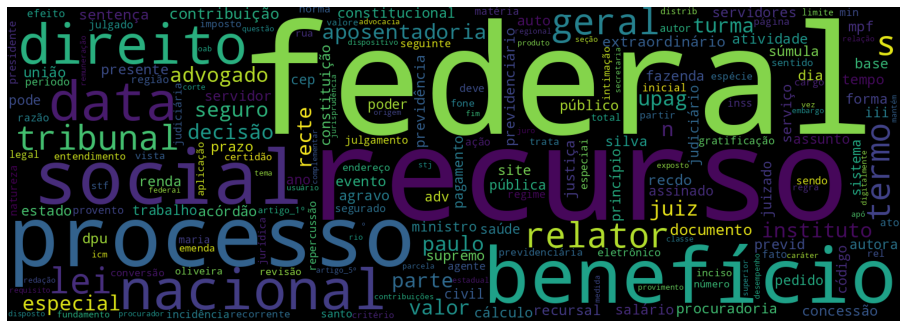

In [32]:
# Nuvem de palavras da Base
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=1520,height=535,collocations=False).generate(" ".join(s for s in tokenized_words))

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud-itd.png',transparent=True)

***
#### **Quantidades de Setenças na Base**

In [35]:
# Realiza a Tokenização
tokenized_words1 =nltk.tokenize.sent_tokenize(all_words)

In [36]:
# Quantidades de Tokens na base
len(tokenized_words1)

1

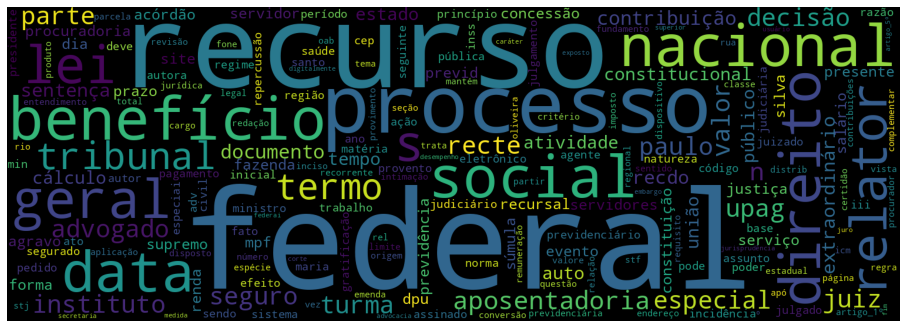

In [37]:
# Nuvem de palavras da Base
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=1520,height=535,collocations=False).generate(" ".join(s for s in tokenized_words))

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud-itd.png',transparent=True)

***
#### **Quantidades de Setenças por Registro**

In [38]:
quant = len(tokenized_words1)
sent = quant/len(dataset.index)
print(sent)

4.848672918222283e-06


In [75]:
all_words1 = dataset.process_id[0]
# Lê a coluna e armazena em uma variavel
all_words2 = dataset.file_name[0] 
all_words3 = dataset.document_type[0]
all_words5 = dataset.body[0]

In [52]:
# Realiza a Tokenização
tokens_process = nltk.tokenize.sent_tokenize(all_words1)
tokens_file = nltk.tokenize.sent_tokenize(all_words2)
tokens_dpc = nltk.tokenize.sent_tokenize(all_words3)
tokens_body= nltk.tokenize.sent_tokenize(all_words5)

In [53]:
# Quantidades de Tokens na base
print('SETENÇAS DOS PROCESSOS')
print(len(tokens_process))
print('SETENÇAS DO ARQUIVO')
print(len(tokens_file ))
print('SETENÇAS Do DOCUMENTO')
print(len(tokens_dpc))
print('SETENÇAS DO BODY')
print(len(tokens_body))

SETENÇAS DOS PROCESSOS
1
SETENÇAS DO ARQUIVO
1
SETENÇAS Do DOCUMENTO
1
SETENÇAS DO BODY
1


In [78]:
from nltk.tokenize import RegexpTokenizer
# Método de quebra dos dados
tokenizer = RegexpTokenizer(r'\w+')
# Gerando listas de sentenças quebradas
dataset["tokens"] = dataset["body"].apply(tokenizer.tokenize)

In [79]:
#Inspecioanndo novamente os dados
all_words = [word for tokens in dataset["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in dataset["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s Quantidade total de palavras, com um vocabulario de %s" % (len(all_words), len(VOCAB)))
print("Tamanho máximo de uma sentença %s" % max(sentence_lengths))

20897578 Quantidade total de palavras, com um vocabulario de 189568
Tamanho máximo de uma sentença 2470


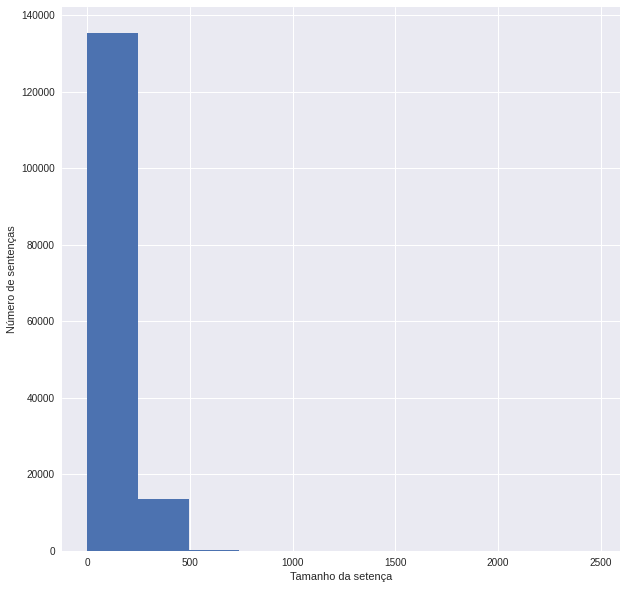

In [80]:
#Distribuilção das sentenças por quantidade de palavras
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Tamanho da setença')
plt.ylabel('Número de sentenças')
plt.hist(sentence_lengths)
plt.show()

***
#### **Quantidades de Tokens por Registro**

In [81]:
quant = len(tokenized_words)
sent = quant/len(dataset.index)
print(sent)

199.53929512052918


In [82]:
all_words1 = dataset.process_id[0]
# Lê a coluna e armazena em uma variavel
all_words2 = dataset.file_name[0] 
all_words3 = dataset.document_type[0]
all_words5 = dataset.body[0]

In [84]:
# Realiza a Tokenização
tokens_process = nltk.tokenize.word_tokenize(all_words1)
tokens_file = nltk.tokenize.word_tokenize(all_words2)
tokens_dpc = nltk.tokenize.word_tokenize(all_words3)
tokens_body= nltk.tokenize.word_tokenize(all_words5)

In [85]:
# Quantidades de Tokens na base
print('SETENÇAS DOS PROCESSOS')
print(len(tokens_process))
print('SETENÇAS DO ARQUIVO')
print(len(tokens_file ))
print('SETENÇAS Do DOCUMENTO')
print(len(tokens_dpc))
print('SETENÇAS DO BODY')
print(len(tokens_body))

SETENÇAS DOS PROCESSOS
1
SETENÇAS DO ARQUIVO
1
SETENÇAS Do DOCUMENTO
1
SETENÇAS DO BODY
57


***
#### **Quantidades de Tokens por Campos**

In [86]:
all_words = ' '.join([word for word in dataset['process_id'].astype(str)])  
# Lê a coluna e armazena em uma variavel
all_words1 = ' '.join([word for word in dataset['file_name'].astype(str)])  
# Lê a coluna e armazena em uma variavel
all_words2 = ' '.join([word for word in dataset['document_type'].astype(str)]) 
# Lê a coluna e armazena em uma variavel
all_words3 = ' '.join([word for word in dataset['body'].astype(str)]) 

In [87]:
# Realiza a Tokenização
tokens_process = nltk.tokenize.word_tokenize(all_words)
tokens_file = nltk.tokenize.word_tokenize(all_words1)
tokens_dpc = nltk.tokenize.word_tokenize(all_words2)
tokens_body= nltk.tokenize.word_tokenize(all_words3)

In [88]:
# Quantidades de Tokens na base
print('SETENÇAS DOS PROCESSOS')
print(len(tokens_process))
print('SETENÇAS DO ARQUIVO')
print(len(tokens_file ))
print('SETENÇAS Do DOCUMENTO')
print(len(tokens_dpc))
print('SETENÇAS DO BODY')
print(len(tokens_body))

SETENÇAS DOS PROCESSOS
149217
SETENÇAS DO ARQUIVO
149217
SETENÇAS Do DOCUMENTO
149217
SETENÇAS DO BODY
20897578


***
#### **Quantidades de Palavras Raras por Registro**

In [89]:
words_uniques =[]
inicio = time.process_time()
for _, pet in enumerate(dataset.body[0]):
  words_uniques.append(textlytics.uniqueWordsCounter(pet))
fim = time.process_time() - inicio
print("Tempo de processamento (segundos): ", fim)
print('Total: ', sum(words_uniques))
print('Média: ', sum(words_uniques) / dataset.shape[0])

Tempo de processamento (segundos):  0.02022065100004511
Total:  417
Média:  0.002794587748044794


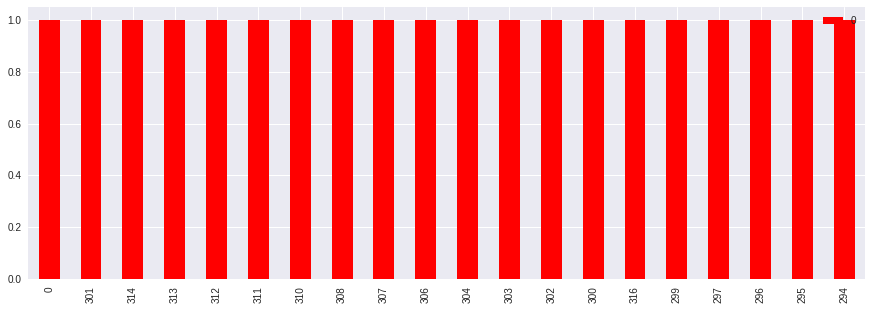

In [90]:
data = pd.DataFrame(words_uniques).sort_values(by=[0], ascending=False)
data[:20].plot(kind='bar', color='red', figsize=(15,5))
plt.show()

In [91]:
rare_words =[]
inicio = time.process_time()
rare_words.append(textlytics.rareWordsRatio(dataset.body[2]))
print("Tempo de processamento (segundos): ", fim)
print('Total: ', sum(rare_words))
print('Média: ', sum(rare_words) / dataset.shape[0])

Tempo de processamento (segundos):  0.02022065100004511
Total:  0.736
Média:  4.932413867052681e-06


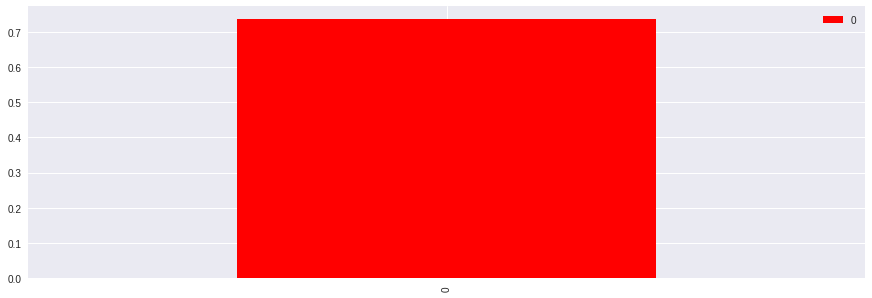

In [92]:
data = pd.DataFrame(rare_words).sort_values(by=[0], ascending=False)
data[:20].plot(kind='bar', color='red', figsize=(15,5))
plt.show()